## Instalando bibliotecas e montando o drive

In [ ]:
from google.colab import drive 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import classification_report

In [ ]:
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/projeto_final_pos_mba_data_science/iris_dataset.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# extracao do dataset com sucesso
df

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Categorizando variáveis

In [ ]:
independent = df.columns[1:-1]
print(independent)
X = df[independent].values
print(X[:5])

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm'],
      dtype='object')
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
dependent = df.columns[-1]
print(dependent)
y = df[dependent].values
print(y[:5])

class
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


## Dividindo dataset em teste e treino

In [ ]:
# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 0)

In [ ]:
f"dataset independente de treino:{X_train.shape} . Vetor dependente de treino:{y_train.shape}"

'dataset independente de treino:(82, 4) . Vetor dependente de treino:(82,)'

In [ ]:
f"dataset independente de teste:{X_test.shape} . Vetor dependente de teste:{y_test.shape}"

'dataset independente de teste:(68, 4) . Vetor dependente de teste:(68,)'

In [ ]:
# normalizando o dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# fazendo fitting do classificado com o training dataset
classifier = KNeighborsClassifier(n_neighbors = 2, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

## Previsão e resultados

In [ ]:
# prevendo o o resultado do teste
y_pred = classifier.predict(X_test)

In [ ]:
# criando a matriz de confusao
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17  0  0]
 [ 0 27  1]
 [ 0  4 19]]


In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.87      0.96      0.92        28
 Iris-virginica       0.95      0.83      0.88        23

       accuracy                           0.93        68
      macro avg       0.94      0.93      0.93        68
   weighted avg       0.93      0.93      0.93        68



## Uma nova abordagem mais iterativa para determinar K

In [ ]:
# criando um iterador para testas multiplos knn com diferentes valores de k

error_rate = []
for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred =  knn.predict(X_test)
  if k ==1: # apenas para ser mais ilustrativos eu vou imprimir a primeira iteração
    print(f"y_pred:{y_pred}")
    print(f"y_test:{y_pred}")
  error_rate.append(np.mean(y_pred != y_test)) # checanod quando predição é diferente do teste e realizando média. Apó isso eu apendo

y_pred:['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolo

### Analisando iteracao de K

Determinando através de 'elbow method'

Text(0, 0.5, 'Error Rate')

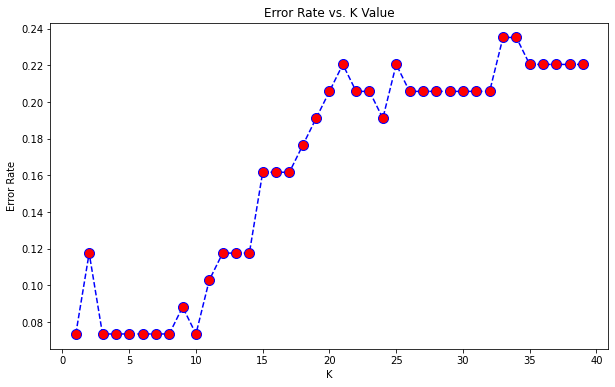

In [ ]:
# até por volta de k=10 o error rate permanece baixo
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Resultado para k otimizado

In [ ]:
k=10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_pred =  knn.predict(X_test)

In [ ]:
# construindo dataframe comparando resultado com k otimizado
df_resultado = pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'predict_result':y_test==y_pred})
df_resultado

,y_test,y_pred,predict_result
0,Iris-virginica,Iris-virginica,True
1,Iris-versicolor,Iris-versicolor,True
2,Iris-setosa,Iris-setosa,True
3,Iris-virginica,Iris-virginica,True
4,Iris-setosa,Iris-setosa,True
...,...,...,...
63,Iris-versicolor,Iris-versicolor,True
64,Iris-versicolor,Iris-versicolor,True
65,Iris-versicolor,Iris-versicolor,True
66,Iris-versicolor,Iris-versicolor,True


## Benefícios
Realizar via código traz diversas vantagens. Apesar de ser menos didático que a construção na planilha, o script permite:
- Velocidade na execução
- Iterar múltiplos modelos (otimizando k)
- Visualização gráfica
- Bibliotecas utilizadas de mercad (ex: normalizacao, splitting training/test, entre outras)